# Module 4: Labs Bivariate analysis - 2 qualitative variables


In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation


## Labo 1 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

- χ² ≈ 18.279
- Cramér's V ≈ 0.194


In [2]:
dataFrame = pd.read_csv('../data/MuziekWijn.csv')


Read the dataset


In [3]:
dataFrame.head()


,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Give the names of both columns. What is wrong?


In [4]:
dataFrame.columns


Index(['Muziek', ' Wijn'], dtype='object')

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.


In [5]:
dataFrame = dataFrame.rename(columns={' Wijn': 'Wijn'})
dataFrame.columns


Index(['Muziek', 'Wijn'], dtype='object')

1. Set up the correct crosstab.


In [6]:
# niet noodzakelijk -> De onafhankelijke variabelen als kolommen
# en afhankelijke variabelen als rijen
observed = pd.crosstab(dataFrame.Wijn, dataFrame.Muziek)
observed.head()


Muziek,Franse,Geen,Italiaanse
Wijn,,,
Andere,35,43,35
Franse,39,30,30
Italiaanse,1,11,19


2. Determine the marginal totals.


In [7]:
# Voorzicht mee zijn als je margins gebruikt,
# want pd kan denken dat dit een gewone kolom is
observed = pd.crosstab(dataFrame.Wijn, dataFrame.Muziek, margins=True)
observed.head()

observed = pd.crosstab(dataFrame.Wijn, dataFrame.Muziek)


In [8]:
#! 2de manier
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')


Wijn
 Andere        113
 Franse         99
 Italiaanse     31
dtype: int64
Muziek
Franse        75
Geen          84
Italiaanse    84
dtype: int64
Number of observations: 243


3. Determine the expected results.


In [9]:
expected = np.outer(row_sums, col_sums) / n
expected


array([[34.87654321, 39.0617284 , 39.0617284 ],
       [30.55555556, 34.22222222, 34.22222222],
       [ 9.56790123, 10.71604938, 10.71604938]])

4. Calculate the χ² test statistic.


In [10]:
diffs = (expected - observed)**2 / expected
print(diffs)

chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' % chi_squared)


Muziek         Franse      Geen  Italiaanse
Wijn                                       
 Andere      0.000437  0.397063    0.422348
 Franse      2.333737  0.520924    0.520924
 Italiaanse  7.672417  0.007524    6.403837
χ² ≈ 18.279


In [11]:
# Met dit kan je alles in 1 keer uitrekenen
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squard        : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value.          : %.4f" % p)


Chi-squard        : 18.2792
Degrees of freedom: 4
P-value.          : 0.0011


5. Calculate Cramér's V. What can you conclude from this?


In [12]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)


0.19393696480652944


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

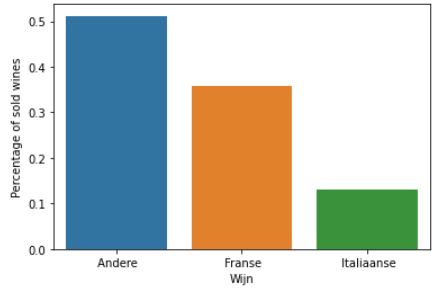


Muziek       Franse  Geen  Italiaanse
Wijn                                 
 Andere          35    43          35
 Franse          39    30          30
 Italiaanse       1    11          19


Text(0, 0.5, 'Percentage of sold wines')

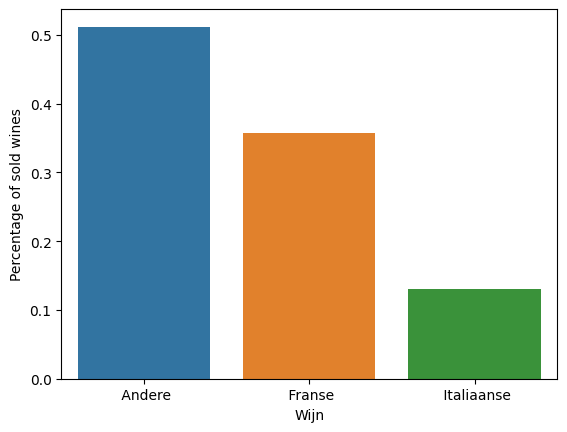

In [13]:
print(observed)
ax = sns.barplot(x=observed.loc[:, 'Geen'].index,
                 y=observed.loc[:, 'Geen'] / np.sum(observed.loc[:, 'Geen']))
ax.set_ylabel('Percentage of sold wines')


Plot a clustered bar chart of the dataset

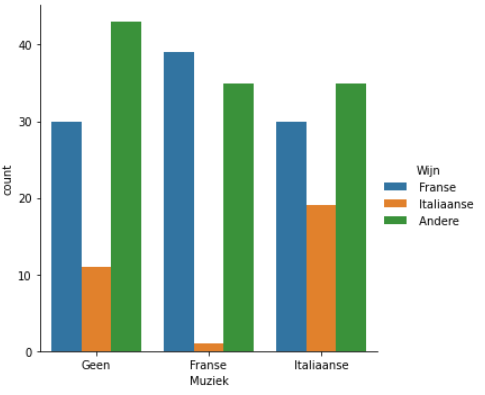


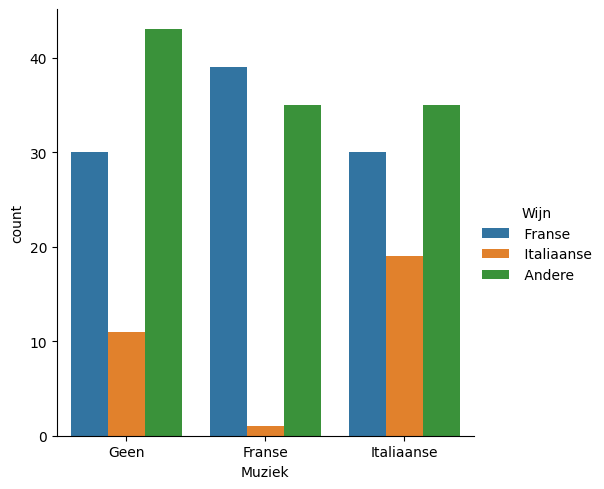

In [14]:
sns.catplot(data=dataFrame, x="Muziek", hue='Wijn', kind="count")


Plot a bar chart (stacked bar chart) of the dataset

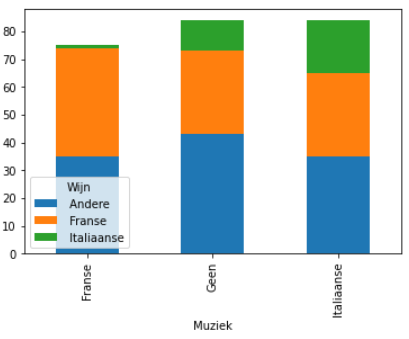


<Axes: xlabel='Muziek'>

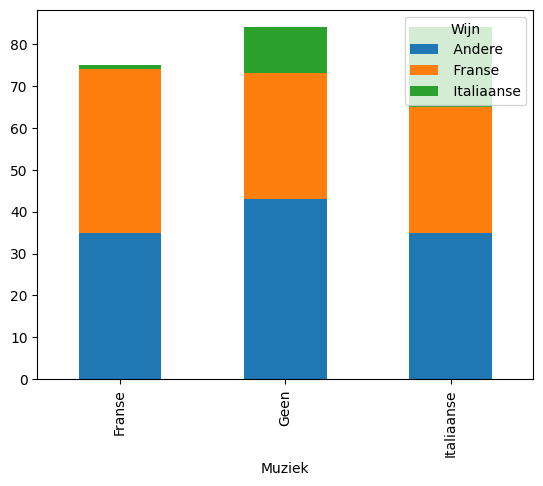

In [15]:
# observed getransponeerd met .T.
observed.T.plot(kind='bar', stacked=True)


## Labo 2 - Survey

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

- First, think about what exactly you expect for the given combination of variables.
- Make a frequency table for the two variables. The (presumably) independent variable comes first.
- Plot a graph visualizing the relationship between the two variables.

* Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?

- Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
- Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
- Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?

The variables to be investigated:

| Independent variabele      | Dependent variabele                        |
| :------------------------- | :----------------------------------------- |
| `Exer` (practicing sports) | `Smoke`                                    |
| `Sex` (gender)             | `Smoke`                                    |
| `W.Hnd` (dominant hand)    | `Fold` (top hand when you cross your arms) |
| `Sex`                      | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627


Read the dataset.


In [16]:
dataFrame = pd.read_csv('../data/survey.csv')


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.


In [17]:
dataFrame.Exer.unique()


array(['Some', 'None', 'Freq'], dtype=object)

In [18]:
exer_type = CategoricalDtype(
    categories=['None', 'Some', 'Freq'], ordered=True)
dataFrame.Exer = dataFrame.Exer.astype(exer_type)
dataFrame.Exer.unique()


['Some', 'None', 'Freq']
Categories (3, object): ['None' < 'Some' < 'Freq']

In [19]:
dataFrame.Smoke.unique()


array(['Never', 'Regul', 'Occas', 'Heavy', nan], dtype=object)

In [20]:
smokes_type = CategoricalDtype(
    categories=['Never', 'Occas', 'Regul', 'Heavy'], ordered=True)
dataFrame.Smoke = dataFrame.Smoke.astype(smokes_type)
dataFrame.Smoke.unique()


['Never', 'Regul', 'Occas', 'Heavy', NaN]
Categories (4, object): ['Never' < 'Occas' < 'Regul' < 'Heavy']

- Make a frequency table for the two variables. The (presumably) independent variable comes first.
- Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the χ2 statistic? Why?
- Run the χ2 test to determine whether there is a relationship between the two variables. Calculate the χ2 statistic, the critical limit g and the p value, each for significance level α=0.05 .
- Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
- Calculate Cramér's V. Do you come to a similar conclusion as with the χ2 test?

The variables to be investigated:

| Independent variabele      | Dependent variabele                        |
| :------------------------- | :----------------------------------------- |
| `Exer` (practicing sports) | `Smoke`                                    |
| `Sex` (gender)             | `Smoke`                                    |
| `W.Hnd` (dominant hand)    | `Fold` (top hand when you cross your arms) |
| `Sex`                      | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627


Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483


In [21]:
observed = pd.crosstab(dataFrame.Smoke, dataFrame.Exer)
observed


Exer,None,Some,Freq
Smoke,,,
Never,18,84,87
Occas,3,4,12
Regul,1,7,9
Heavy,1,3,7


In [22]:
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squard        : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value.          : %.4f" % p)

alpha = 0.05
g = stats.chi2.isf(alpha, df=df)
print('Critical value    : %.4f' % g)


Chi-squard        : 5.4885
Degrees of freedom: 6
P-value.          : 0.4828
Critical value    : 12.5916


In [23]:
'''
Stap 1
H0: Er is geen verband tussen Exer en Smoke
H1: Er is wel verband tussen Exer en Smoke

Stap 2
Kies het significantieniveau = alpha = 0.05

Stap 3
Bereken de chi^2 waarde
Chi-squard : 5.4885

Stap 4
Bereken de kritische waarde g = 12,5916
Bereken de p-waarde p = 0,4828

Niet 5
Conclusie
Er is onvoldoende bewijs om H0 (chi^2 < g en p > 0,05) te verwerpen.
'''


'\nStap 1\nH0: Er is geen verband tussen Exer en Smoke\nH1: Er is wel verband tussen Exer en Smoke\n\nStap 2\nKies het significantieniveau = alpha = 0.05\n\nStap 3\nBereken de chi^2 waarde\nChi-squard : 5.4885\n\nStap 4\nBereken de kritische waarde g = 12,5916\nBereken de p-waarde p = 0,4828\n\nNiet 5\nConclusie\nEr is onvoldoende bewijs om H0 (chi^2 < g en p > 0,05) te verwerpen.\n'

W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454


Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314


In [24]:
observed = pd.crosstab(dataFrame.Smoke, dataFrame.Sex)
observed


Sex,Female,Male
Smoke,,
Never,99,89
Occas,9,10
Regul,5,12
Heavy,5,6


In [25]:
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squard        : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value.          : %.4f" % p)

alpha = 0.05
g = stats.chi2.isf(alpha, df=df)
print('Critical value    : %.4f' % g)


Chi-squard        : 3.5536
Degrees of freedom: 3
P-value.          : 0.3139
Critical value    : 7.8147


In [26]:
'''
Stap 1
H0: Er is geen verband tussen Sex en Smoke
H1: Er is wel verband tussen Sex en Smoke

Stap 2
Kies het significantieniveau = alpha = 0.05

Stap 3
Bereken de chi^2 waarde
Chi-squard : 3.5536

Stap 4
Bereken de kritische waarde g = 7.8147
Bereken de p-waarde p = 0.3139

Niet 5
Conclusie
Er is onvoldoende bewijs om H0 (chi^2 < g en p > 0,05) te verwerpen.
'''


'\nStap 1\nH0: Er is geen verband tussen Sex en Smoke\nH1: Er is wel verband tussen Sex en Smoke\n\nStap 2\nKies het significantieniveau = alpha = 0.05\n\nStap 3\nBereken de chi^2 waarde\nChi-squard : 3.5536\n\nStap 4\nBereken de kritische waarde g = 7.8147\nBereken de p-waarde p = 0.3139\n\nNiet 5\nConclusie\nEr is onvoldoende bewijs om H0 (chi^2 < g en p > 0,05) te verwerpen.\n'

Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627


In [27]:
observed = pd.crosstab(dataFrame['W.Hnd'], dataFrame.Sex)
observed


Sex,Female,Male
W.Hnd,,
Left,7,10
Right,110,108


In [28]:
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squard        : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value.          : %.4f" % p)

alpha = 0.05
g = stats.chi2.isf(alpha, df=df)
print('Critical value    : %.4f' % g)


Chi-squard        : 0.2356
Degrees of freedom: 1
P-value.          : 0.6274
Critical value    : 3.8415


## Labo 3 - Digimeter

Every year, Imec (formerly iMinds) carries out a study on the use of digital technologies in Flanders, the Digimeter (Vanhaelewyn & De Marez, 2016). In this exercise we will check whether the sample of the Digimeter 2016 (n = 2164) is representative of the population in terms of the age categories of the participants.

You can find the frequency tables in the following data files:

- `data/leeftijden-digimeter.csv`: relative frequencies of the age of participants in the iMec Digimeter 2016 and the Flemish population (as reported in the Digimeter publication)
- `data/leeftijden-bestat-vl.csv`: absolute frequencies for the different age categories of the Flemish population (Source: BelStat, <https://bestat.economie.fgov.be/bestat/> , C01.1: Population by place of residence (province), sex, position in the household (C), marital status and age (B)).

1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.
2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate this.
3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.
4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?

Results of the main calculations (rounded up to 3 decimal places):

- χ² ≈ 6.700 (df = 6),
- g ≈ 12.592,
- p ≈ 0.350


Read the dataset `data/leeftijden-digimeter.csv`  
Make sure the Percentages are actually percentages.


In [54]:
dataFrame_1 = pd.read_csv('../data/leeftijden-digimeter.csv')
dataFrame_1['Percentage'] = dataFrame_1['Percentage'] / 100
dataFrame_1

,Leeftijdsgroep,Percentage
0,15-19,0.066
1,20-29,0.142
2,30-39,0.150
3,40-49,0.163
4,50-59,0.173
5,60-64,0.073
6,64+,0.232


Read the dataset `leeftijden-bestat-vl.csv`


In [30]:
bestat = pd.read_csv('../data/leeftijden-bestat-vl.csv')
bestat


,age.group,population
0,0-5,352017
1,5-9,330320
2,10-14,341303
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587
8,40-44,458485
9,45-49,493720


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.

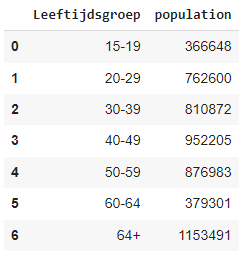


In [36]:
bestat = bestat[(bestat['age.group'] != '0-5') & (bestat['age.group'] != '5-9') & (bestat['age.group'] != '10-14')]
bestat.head(10)

,age.group,population,leeftijdsgroep
3,15-19,366648,15-19
4,20-24,375469,20-29
5,25-29,387131,20:29
6,30-34,401285,30-39
7,35-39,409587,30-39
8,40-44,458485,40-49
9,45-49,493720,40-49
10,50-54,463668,50-59
11,55-59,413315,50-59
12,60-64,379301,60-64


In [40]:
dic = {'15-19': '15-19', '20-24': '20-29','25-29': '20-29', '30-34': '30-39', '35-39': '30-39', '40-44': '40-49', '45-49': '40-49', '50-54': '50-59', '55-59': '50-59','60-64':'60-64'}
bestat['leeftijdsgroep'] = bestat['age.group'].map(dic).fillna('64+')
bestat.head(20)


,age.group,population,leeftijdsgroep
3,15-19,366648,15-19
4,20-24,375469,20-29
5,25-29,387131,20-29
6,30-34,401285,30-39
7,35-39,409587,30-39
8,40-44,458485,40-49
9,45-49,493720,40-49
10,50-54,463668,50-59
11,55-59,413315,50-59
12,60-64,379301,60-64


2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate these.  
   Answer = [142.824 307.288 324.6 352.732 374.372 157.972 502.048]


In [47]:
help = bestat.groupby('leeftijdsgroep')['population'].sum().reset_index()
help

,leeftijdsgroep,population
0,15-19,366648
1,20-29,762600
2,30-39,810872
3,40-49,952205
4,50-59,876983
5,60-64,379301
6,64+,1153491


3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.  
   Answer = [0.06915147 0.1438298 0.15293412 0.17959016 0.16540295 0.07153788
   0.21755361]


In [49]:
help['popu_%'] = help['population'] / sum(help['population'])
help

,leeftijdsgroep,population,popu_%
0,15-19,366648,0.069151
1,20-29,762600,0.143830
2,30-39,810872,0.152934
3,40-49,952205,0.179590
4,50-59,876983,0.165403
5,60-64,379301,0.071538
6,64+,1153491,0.217554


4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?

Results of the main calculations (rounded up to 3 decimal places):

χ² ≈ 6.700 (df = 6),
g ≈ 12.592,
p ≈ 0.350


In [64]:
n = 2164

observed = np.array(dataFrame_1['Percentage']) * n
# Onderste good of fit formule gaf een fout omdat de laatste cijfer te ver van expected was ofzo iets
# Dus zijn we zogezegt aan het vals spelen. (er zijn afrondings fouten)
observed[6] = n - sum(observed[0:6])
observed

array([142.824, 307.288, 324.6  , 352.732, 374.372, 157.972, 504.212])

In [61]:
expected = np.array(help['popu_%']) * n
expected

array([149.64377737, 311.24769431, 330.94943664, 388.63311141,
       357.93199148, 154.80797495, 470.78601384])

In [65]:
# Deze waardes hebben we al
# observerd = np.array([127, 75, 98, 27, 73])
# expoected_p = np_array([.35, .17, .23, .08, .17])
# expected = expected_p * sum(observed)
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("χ² = %.4f" % chi2)
print("p = %.4f" % p)


χ² = 6.9925
p = 0.3215


In [67]:
g = stats.chi2.isf(0.05, df=6)
print("g = %.4f" % g)


g = 12.5916


In [ ]:
'''
Step 1
H0 : sample is representatief
H1: sample is niet representatief

Step 2
Choose significance level = alpha = 0.05

Step 3
Calculate the chi2 value
chi2 = 6.9925

Step 4
Calculate the critical value g = 12.59
Calculate the p-value = 0.3215

Step 5
Conclusion
There is not enough evidence to reject H0 (chi2 < g and p > 0.05)
'''